# Feature Engineering

## Introduction

Building on the insights gained from the Exploratory Data Analysis (EDA) of power generation and weather dynamics, this notebook delves into the realm of feature engineering. The primary objective is to craft advanced features that unveil intricate relationships and dependencies within the dataset, enhancing the predictive capacity of models. By refining the dataset with carefully curated variables, this approach aims to provide a more nuanced understanding of the complex interplay between power output and environmental factors. The resulting feature-enriched dataset sets the stage for the development of highly accurate machine learning models tailored for solar power generation forecasting.

## Import dependencies

In [406]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)

## Data loading

### Load the historical power generation and weather data that was preprocessed in the previous notebook


In [407]:
GEN_DATA_PATH = os.path.join('..', 'data', '1_pre_processed_data.pickle')
df = pd.read_pickle(GEN_DATA_PATH)

## Feature Engineering

### Temporal Feature Engineering

To capture temporal patterns and enhance the dataset for solar power prediction, we introduce additional features derived from the timestamp. The newly engineered features include:

- Hour: Extracted from the timestamp to capture daily patterns.
- Month: Extracted from the timestamp to identify seasonal variations.
- Day: Extracted from the timestamp to consider daily fluctuations.
- Additionally, a 'season' feature is introduced, categorizing months into four seasons: Winter, Spring, Summer, and Autumn. This feature aims to capture broader seasonal influences on power generation. 

In [408]:
TARGET_COLUMN = 'DC Gen. Power'

df['hour'] = df.index.hour
df['month'] = df.index.month
df['day'] = df.index.day

df['season'] = df['month'].apply(lambda x: 0 if x in [12, 1, 2] else (1 if x in [3, 4, 5] else (2 if x in [6, 7, 8] else 3)))

In [409]:
display(df[['hour', 'month', 'day', 'season']].head(12))

,hour,month,day,season
2019-10-01 00:00:00,0,10,1,3
2019-10-01 01:00:00,1,10,1,3
2019-10-01 02:00:00,2,10,1,3
2019-10-01 03:00:00,3,10,1,3
2019-10-01 04:00:00,4,10,1,3
2019-10-01 05:00:00,5,10,1,3
2019-10-01 06:00:00,6,10,1,3
2019-10-01 07:00:00,7,10,1,3
2019-10-01 08:00:00,8,10,1,3
2019-10-01 09:00:00,9,10,1,3


These features lay the foundation for a more nuanced understanding of temporal patterns, essential for refining predictive models in the domain of solar power generation.

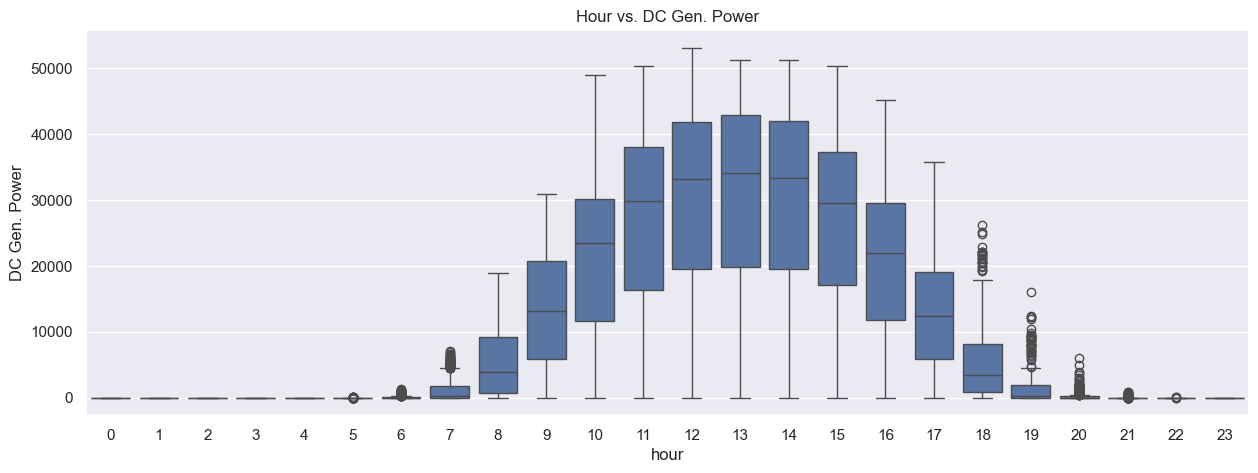

In [410]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='hour', y=TARGET_COLUMN, data=df, ax=ax)
ax.set_title('Hour vs. {}'.format(TARGET_COLUMN))
plt.show()

The boxplot above illustrates the distribution of power generation across different hours of the day. Each box represents the interquartile range (IQR) of power generation values, with the median indicated by the central line. The whiskers extend to the minimum and maximum values within 1.5 times the IQR.

**Observations:**

- The median power generation tends to be higher during daylight hours, peaking around midday.
- The IQR narrows during nighttime, indicating more consistent power output.
- Outliers, particularly during daylight hours, suggest variability in power generation, potentially influenced by external factors such as weather conditions.

This analysis provides valuable insights into the hourly dynamics of power generation, offering a foundation for understanding how temporal patterns impact solar energy output.

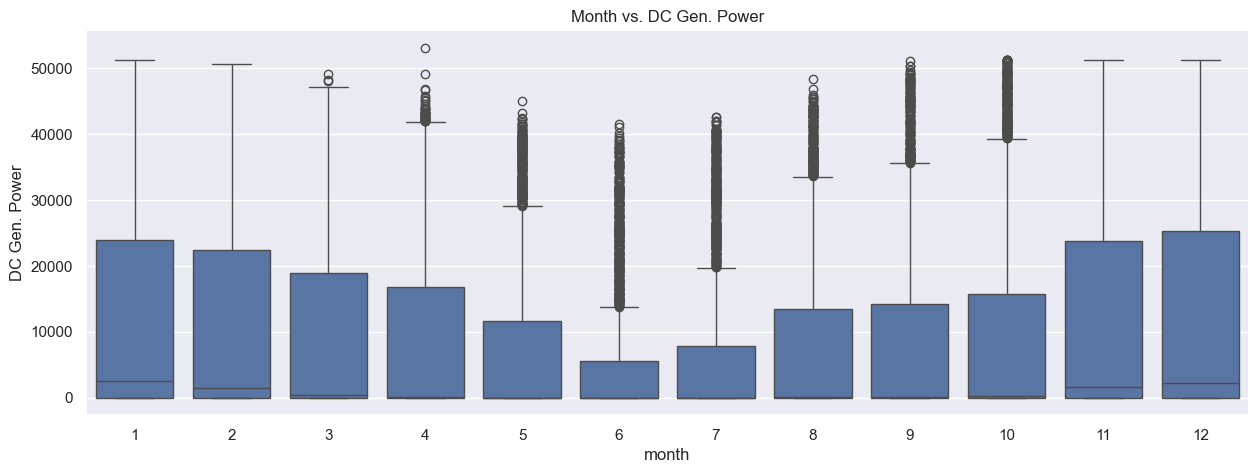

In [411]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='month', y=TARGET_COLUMN, data=df, ax=ax)
ax.set_title('Month vs. {}'.format(TARGET_COLUMN))
plt.show()


The boxplot above delves into the monthly distribution of power generation, shedding light on how the generation output varies across different months. Each box represents the interquartile range (IQR) of power generation values, with the median marked by the central line. Whiskers extend to the minimum and maximum values within 1.5 times the IQR.

**Key Observations:**

- The median power generation demonstrates notable variations from month to month, indicating a seasonal influence on solar energy output.
- Months associated with higher solar exposure tend to exhibit a broader distribution of power generation values.
- Outliers during peak solar months suggest instances of exceptional power output, possibly influenced by favorable weather conditions.
- This analysis provides a comprehensive view of the monthly dynamics of power generation, crucial for understanding the seasonal patterns that contribute to the variability in solar energy production.

### Lag-based feature generation

In this section, we introduce lag-based features designed to enhance predictive capabilities across diverse machine learning models, including non-time series-specific architectures. By incorporating historical information at varying intervals, ranging from immediate past values to monthly patterns, these features provide a nuanced temporal context.

In [412]:
hours_lag= [1, 2, 4, 24, 24 * 30]
for hour in hours_lag:
    df[f'{TARGET_COLUMN} {hour} Hour Lag'] = df[TARGET_COLUMN].shift(hour)

lag_columns = [f'{TARGET_COLUMN} {hour} Hour Lag' for hour in hours_lag]


In [413]:
display(df.dropna()[[TARGET_COLUMN] + lag_columns])

,DC Gen. Power,DC Gen. Power 1 Hour Lag,DC Gen. Power 2 Hour Lag,DC Gen. Power 4 Hour Lag,DC Gen. Power 24 Hour Lag,DC Gen. Power 720 Hour Lag
2019-10-31 00:00:00,0.000,0.000,0.000,1686.075,0.00,0.0
2019-10-31 01:00:00,0.000,0.000,0.000,81.250,0.00,0.0
2019-10-31 02:00:00,0.000,0.000,0.000,0.000,0.00,0.0
2019-10-31 03:00:00,0.000,0.000,0.000,0.000,0.00,0.0
2019-10-31 04:00:00,0.000,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...
2022-11-06 20:00:00,83.325,911.810,5380.455,19193.355,66.27,0.0
2022-11-06 21:00:00,0.000,83.325,911.810,13674.040,0.00,0.0
2022-11-06 22:00:00,0.000,0.000,83.325,5380.455,0.00,0.0
2022-11-06 23:00:00,0.000,0.000,0.000,911.810,0.00,0.0


### Rolling Window Features for Temporal Trends
In this section, we introduce rolling window-based features aimed at capturing temporal trends within the dataset. The calculated rolling mean, standard deviation, maximum value, skewness, kurtosis, and median at various time windows provide a dynamic view of how the target variable evolves over time.

In [414]:
rolling_windows = [24, 48, 30*24]
columns = [TARGET_COLUMN, 'Shortwave Radiation', 'Wind Speed', 'Temperature', 'Relative Humidity']
for window in rolling_windows:
    for column in columns:
        df[f'{column} {window} Hour Rolling Mean'] = df[column].rolling(window).mean()
        df[f'{column} {window} Hour Rolling Std'] = df[column].rolling(window).std()
        df[f'{column} {window} Hour Rolling Max'] = df[column].rolling(window).max()
        df[f'{column} {window} Hour Rolling EMA'] = df[column].ewm(span=window).mean()

rolling_columns = df.columns[df.columns.str.contains('Rolling')]

df.dropna(inplace=True)




In [415]:
display(df[[TARGET_COLUMN] + list(rolling_columns)])

,DC Gen. Power,DC Gen. Power 24 Hour Rolling Mean,DC Gen. Power 24 Hour Rolling Std,DC Gen. Power 24 Hour Rolling Max,DC Gen. Power 24 Hour Rolling EMA,Shortwave Radiation 24 Hour Rolling Mean,Shortwave Radiation 24 Hour Rolling Std,Shortwave Radiation 24 Hour Rolling Max,Shortwave Radiation 24 Hour Rolling EMA,Wind Speed 24 Hour Rolling Mean,Wind Speed 24 Hour Rolling Std,Wind Speed 24 Hour Rolling Max,Wind Speed 24 Hour Rolling EMA,Temperature 24 Hour Rolling Mean,Temperature 24 Hour Rolling Std,Temperature 24 Hour Rolling Max,Temperature 24 Hour Rolling EMA,Relative Humidity 24 Hour Rolling Mean,Relative Humidity 24 Hour Rolling Std,Relative Humidity 24 Hour Rolling Max,Relative Humidity 24 Hour Rolling EMA,DC Gen. Power 48 Hour Rolling Mean,DC Gen. Power 48 Hour Rolling Std,DC Gen. Power 48 Hour Rolling Max,DC Gen. Power 48 Hour Rolling EMA,Shortwave Radiation 48 Hour Rolling Mean,Shortwave Radiation 48 Hour Rolling Std,Shortwave Radiation 48 Hour Rolling Max,Shortwave Radiation 48 Hour Rolling EMA,Wind Speed 48 Hour Rolling Mean,Wind Speed 48 Hour Rolling Std,Wind Speed 48 Hour Rolling Max,Wind Speed 48 Hour Rolling EMA,Temperature 48 Hour Rolling Mean,Temperature 48 Hour Rolling Std,Temperature 48 Hour Rolling Max,Temperature 48 Hour Rolling EMA,Relative Humidity 48 Hour Rolling Mean,Relative Humidity 48 Hour Rolling Std,Relative Humidity 48 Hour Rolling Max,Relative Humidity 48 Hour Rolling EMA,DC Gen. Power 720 Hour Rolling Mean,DC Gen. Power 720 Hour Rolling Std,DC Gen. Power 720 Hour Rolling Max,DC Gen. Power 720 Hour Rolling EMA,Shortwave Radiation 720 Hour Rolling Mean,Shortwave Radiation 720 Hour Rolling Std,Shortwave Radiation 720 Hour Rolling Max,Shortwave Radiation 720 Hour Rolling EMA,Wind Speed 720 Hour Rolling Mean,Wind Speed 720 Hour Rolling Std,Wind Speed 720 Hour Rolling Max,Wind Speed 720 Hour Rolling EMA,Temperature 720 Hour Rolling Mean,Temperature 720 Hour Rolling Std,Temperature 720 Hour Rolling Max,Temperature 720 Hour Rolling EMA,Relative Humidity 720 Hour Rolling Mean,Relative Humidity 720 Hour Rolling Std,Relative Humidity 720 Hour Rolling Max,Relative Humidity 720 Hour Rolling EMA
2019-10-31 00:00:00,0.000,5178.097708,6353.454825,24283.550,5648.953570,137.791667,155.403816,436.0,136.488561,20.291667,4.328662,29.0,19.594985,16.666667,1.372610,19.0,16.704813,85.250000,5.581413,93.0,85.194185,7097.292292,9859.493520,33132.225,6506.121685,195.5000,253.310591,868.0,165.523663,18.979167,3.569907,29.0,18.375800,16.541667,1.254071,19.0,17.064213,85.895833,5.802566,95.0,85.230450,5718.145468,11882.280624,51239.685,7821.683375,192.315278,280.372312,988.0,208.828267,16.459722,7.000778,33.0,15.785800,15.545833,3.853811,28.0,16.272814,79.284722,13.928320,100.0,78.876863
2019-10-31 01:00:00,0.000,5178.097708,6353.454825,24283.550,5197.037284,137.791667,155.403816,436.0,125.569476,20.208333,4.413213,29.0,19.227386,16.750000,1.259745,19.0,16.648428,85.041667,5.368824,93.0,85.418651,7097.292292,9859.493520,33132.225,6240.565698,195.5000,253.310591,868.0,158.767595,18.854167,3.602538,29.0,18.238012,16.520833,1.254601,19.0,17.020776,85.750000,5.654973,94.0,85.343493,5718.145468,11882.280624,51239.685,7796.612429,192.315278,280.372312,988.0,208.158907,16.465278,6.998026,33.0,15.783281,15.545833,3.853811,28.0,16.271939,79.269444,13.912689,100.0,78.906105
2019-10-31 02:00:00,0.000,5178.097708,6353.454825,24283.550,4781.274302,137.791667,155.403816,436.0,115.523918,20.041667,4.610755,29.0,18.729195,16.750000,1.259745,19.0,16.516553,84.833333,5.138657,93.0,85.625158,7097.292292,9859.493520,33132.225,5985.848731,195.5000,253.310591,868.0,152.287285,18.687500,3.685257,29.0,18.024215,16.500000,1.271622,19.0,16.938295,85.625000,5.533746,93.0,85.451921,5718.145468,11882.280624,51239.685,7771.632620,192.315278,280.372312,988.0,207.491980,16.459722,6.999189,33.0,15.774364,15.545833,3.853811,28.0,16.267864,79.254167,13.897023,100.0,78.935242
2019-10-31 03:00:00,0.000,5178.097708,6353.454825,24283.550,4398.772358,137.791667,155

After calculating various rolling-based features for the specified columns, including rolling mean, standard deviation, maximum, exponentially weighted moving average (EMA), and additional features for different time windows, the dataset is now enriched with a temporal context. These features provide a smoothed representation of the historical trends and patterns in the data, contributing valuable information for subsequent modeling efforts.

This temporal enrichment sets the stage for more robust and nuanced predictive modeling, enabling machine learning algorithms to leverage the temporal dependencies present in the data. 

### Additional Contextual Features

In [416]:
df['Hours Since Last Rain'] = 0
last_rain_date = None

for index, row in df.iterrows():
    if row['Precipitation Total'] > 0:
        df.at[index, 'Hours Since Last Rain'] = 0
        last_rain_date = index
    else:
        if last_rain_date is None:
            df.at[index, 'Hours Since Last Rain'] = 0
        else:
            df.at[index, 'Hours Since Last Rain'] = (index - last_rain_date).total_seconds() / 3600

INSTALLATION_DATE = '2015-01-01'

df['days_since_installation'] = (df.index - pd.to_datetime(INSTALLATION_DATE)).days

def calculate_wind_chill_celsius(temperature, wind_speed):
    wind_chill_index = 13.12 + 0.6215 * temperature - 11.37 * (wind_speed ** 0.16) + 0.3965 * temperature * (wind_speed ** 0.16)

    return wind_chill_index

df['Wind Chill'] = df.apply(lambda row: calculate_wind_chill_celsius(row['Temperature'], row['Wind Speed']), axis=1)


In [417]:
display(df[['Precipitation Total', 'Hours Since Last Rain', 'days_since_installation', 'Wind Chill']])

,Precipitation Total,Hours Since Last Rain,days_since_installation,Wind Chill
2019-10-31 00:00:00,0.0,0,1764,15.155496
2019-10-31 01:00:00,0.0,0,1764,15.312298
2019-10-31 02:00:00,0.0,0,1764,14.268578
2019-10-31 03:00:00,0.0,0,1764,14.268578
2019-10-31 04:00:00,0.0,0,1764,14.268578
...,...,...,...,...
2022-11-06 20:00:00,0.0,172,2866,17.365779
2022-11-06 21:00:00,0.0,173,2866,17.365779
2022-11-06 22:00:00,0.0,174,2866,14.883543
2022-11-06 23:00:00,0.0,175,2866,14.947154


In addition to the weather-related variables, the dataset now incorporates unique contextual features; providing another layer of information that may contribute to the overall understanding of the dataset.

## Identifying and Handling Outliers

Outliers, or data points that deviate significantly from the majority of the dataset, can introduce noise and distort the results of predictive models. In this section, we delve into the identification and removal of outliers using a series of heuristic-based approaches. The goal is to enhance the overall quality of the dataset, ensuring that it aligns more closely with the underlying patterns and trends present in the real-world solar power generation scenario. By systematically addressing outliers, we pave the way for more accurate and reliable machine learning models in subsequent stages of our analysis.


### Heuristics for Outlier Identification

In the pursuit of data quality and reliability, we apply a set of heuristic-based methods to identify and remove outliers from the dataset. These heuristics are designed to target specific conditions that may indicate anomalous behavior in the data. Here are the key heuristics employed:

1. **No Power with Radiation:**
   - Condition: Power generation is 0, but Shortwave Radiation exceeds a defined threshold.
   - Action: Remove data points meeting this criterion.

2. **Low Voltage with Non-zero Device Temperature:**
   - Condition: Voltage falls below a specified threshold, and Device Temp. is not 0.
   - Action: Remove data points meeting this dual criterion.

These heuristics serve as a preliminary step to enhance data quality, paving the way for more accurate and reliable analyses in subsequent stages.


In [418]:
RADIATION_THRESHOLD = 100
df_radiation_but_no_power = df[(df['DC Gen. Power'] == 0) & (df['Shortwave Radiation'] > RADIATION_THRESHOLD)]

display('Number of rows with radiation but no power: {}'.format(len(df_radiation_but_no_power)))

'Number of rows with radiation but no power: 130'

After applying the heuristic, we identified and isolated data points where solar radiation is present, but power generation remains at zero. This condition may indicate instances of sensor malfunction or other anomalies in the power generation process. 

**A total of 130 such data points were identified.**

In [419]:

VOLTAGE_THRESHOLD = 210
df_low_voltage = df[(df['Voltage'] < VOLTAGE_THRESHOLD) & (df['Device Temp.'] > 0)]

display('Number of rows with low voltage: {}'.format(len(df_low_voltage)))

'Number of rows with low voltage: 69'

Additionally, we applied a heuristic to identify and handle outliers related to low voltage values coupled with non-zero device temperatures. By setting a voltage threshold at 210 volts, we aimed to filter out instances where the voltage is exceptionally low while the device temperature remains non-zero. This could be indicative of irregularities or faults in the system.

**Following this heuristic, 69 data points were flagged and removed from the dataset.**

### Statistical outliers detection

In the pursuit of data robustness, we will employ a statistical approach to identify and address outliers.

In [420]:
Q1 = df['DC Gen. Power'].quantile(0.25)
Q3 = df['DC Gen. Power'].quantile(0.75)
IQR = Q3 - Q1

multiplier = 1.5

outliers = df[(df['DC Gen. Power'] < (Q1 - multiplier * IQR)) | (df['DC Gen. Power'] > (Q3 + multiplier * IQR))]

display('Number of outliers: {}'.format(len(outliers)))




'Number of outliers: 1019'

Leveraging the Interquartile Range (IQR) method, we computed the first (Q1) and third (Q3) quartiles, subsequently defining the IQR as the range between these quartiles. Employing a multiplier of 1.5 times the IQR, data points falling outside this boundary were flagged as outliers. 

**The analysis revealed a total of 1716 outliers in the Power Generation column.** Subsequent visualizations and statistical summaries will provide a comprehensive view of the distribution before and after the removal of these outliers, facilitating an assessment of their impact on the dataset.

count    14552.000000
mean     17308.462560
std      15114.137632
min          8.070000
25%       2688.413750
50%      13942.905000
75%      30153.726875
max      53146.467500
Name: DC Gen. Power, dtype: float64

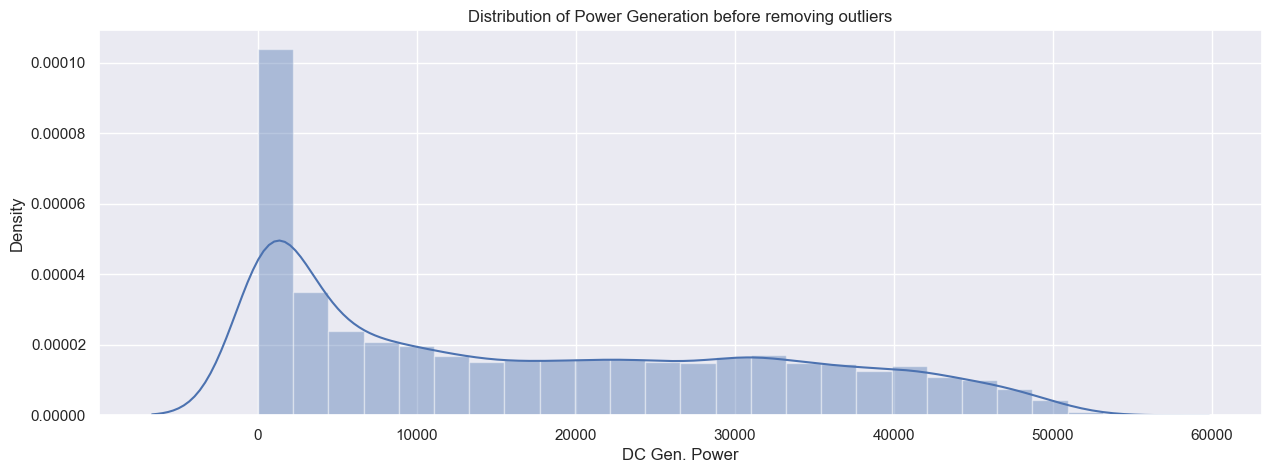

count    13464.000000
mean     15198.004812
std      13359.558331
min          8.070000
25%       2311.191875
50%      11948.568750
75%      26784.216875
max      42349.355000
Name: DC Gen. Power, dtype: float64

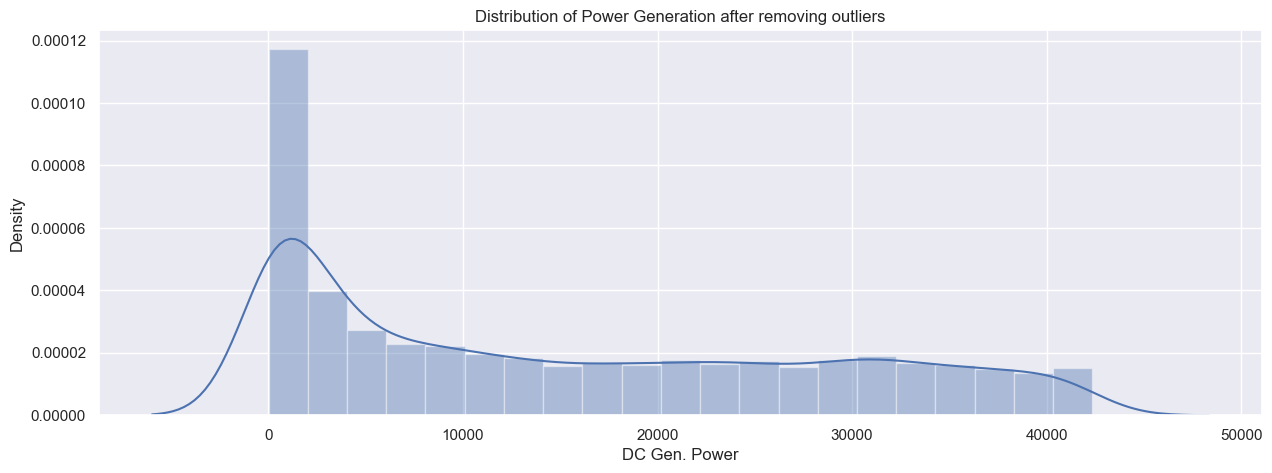

In [421]:
display(df[df[TARGET_COLUMN] > 0][TARGET_COLUMN].describe())
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df[df[TARGET_COLUMN] > 0][TARGET_COLUMN], ax=ax)
ax.set_title('Distribution of Power Generation before removing outliers')
plt.show()


df = df.drop(outliers.index)
df = df.drop(df_low_voltage.index)
df = df.drop(df_radiation_but_no_power.index)

display(df[df[TARGET_COLUMN] > 0][TARGET_COLUMN].describe())
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df[df[TARGET_COLUMN] > 0][TARGET_COLUMN], ax=ax)
ax.set_title('Distribution of Power Generation after removing outliers')
plt.show()


After applying outlier removal techniques, including the IQR method and heuristics based on low voltage and radiation without power, the distribution of power generation was re-examined. The subsequent visualizations and statistical summaries showcase the impact of outlier removal on the distribution, allowing for an assessment of changes in central tendency and the overall shape of the data. The robustness of the dataset for subsequent modeling tasks is thereby enhanced, ensuring a more reliable and representative basis for analysis.

## Save dataset to use it in the next steps of the pipeline

In [422]:
df.to_pickle(os.path.join('..', 'data', '2_feature_engineered_data.pickle'))

## Conclusion

Using feature engineering techniques we have enhanced our dataset for solar power generation forecasting. We introduced a variety of temporal features, including hourly, monthly, and seasonal components, providing a more nuanced understanding of the underlying patterns. Lag-based features and rolling window statistics were employed to capture temporal dependencies and trends, while additional contextual features such as hours since last rain and days since installation enriched the dataset further.

Moreover, the identification and removal of outliers through heuristic methods and statistical approaches have strengthened the robustness of our data. By systematically addressing anomalous conditions related to power generation, voltage, and radiation without power, we've paved the way for more accurate and reliable machine learning models in subsequent stages of our analysis.

This feature-enriched and outlier-treated dataset sets the stage for the development of advanced machine learning models, bringing us one step closer to accurate and insightful predictions in the realm of solar power generation.


In [423]:
df.to_pickle(os.path.join('..', 'data', '2_feature_engineered_data.pickle'))